In [1]:
# Numpy and Pandas libraries
import numpy as np
import pandas as pd

# Visualization libraries
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import plotly.express as px
import plotly.graph_objs as go
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('study_case_clean.csv', index_col=0)
df

,patient_id,experiment_group,patient_created_at,first_cx_booked_at,first_cx_cancelled_at,cx_appointment_at,appointment_attendance,px_booked_at,converted
0,69522307739,with-credit-card,2019-12-20,2019-12-21,NaN,2020-01-11,patient-show,2020-01-13,1
1,931819353745,with-credit-card,2019-12-23,NaN,NaN,NaN,NaN,NaN,0
2,979634255142,with-credit-card,2019-12-19,2019-12-19,NaN,2020-01-05,patient-no-show,NaN,0
3,534016431925,with-credit-card,2019-12-22,NaN,NaN,NaN,NaN,NaN,0
4,934071204695,no-credit-card,2019-12-23,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...
244,622017544373,no-credit-card,2019-12-17,2019-12-21,NaN,2020-01-21,patient-show,NaN,0
245,774314191241,with-credit-card,2019-12-17,2019-12-17,NaN,2019-12-18,patient-show,NaN,0
246,811952273739,with-credit-card,2019-12-22,2019-12-22,NaN,2020-01-14,patient-show,2020-01-21,1
248,30550284109,with-credit-card,2019-12-22,NaN,NaN,NaN,NaN,NaN,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 242 entries, 0 to 249
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   patient_id              242 non-null    int64 
 1   experiment_group        242 non-null    object
 2   patient_created_at      242 non-null    object
 3   first_cx_booked_at      134 non-null    object
 4   first_cx_cancelled_at   16 non-null     object
 5   cx_appointment_at       121 non-null    object
 6   appointment_attendance  121 non-null    object
 7   px_booked_at            12 non-null     object
 8   converted               242 non-null    int64 
dtypes: int64(2), object(7)
memory usage: 18.9+ KB


# Marginal and conditional probabilities for booking

Below I will attempt to compute the best estimate of marginal and conditional probabilities for conversion.

a. What is the probability of an individual making a booking regardless of the page they receive?  𝑃(booking)

In [4]:
n_users = df.shape[0]    #number of all patients in dataset
total_bookings = (df.loc[~df.first_cx_booked_at.isnull()].first_cx_booked_at.count())  #number of patients who made the booking

# Prob of booking regardless of the page
Pbooking = total_bookings / n_users
Pbooking

0.5537190082644629

b. Given that an individual was in the `no-credit-card` group, what is the probability they booked an appointment? $P(booking | no-credit-card)$

In [5]:
# Prob of conversion in no-credit-card group
no_card_df = df.loc[df.experiment_group == "no-credit-card"]
n_no_card = no_card_df.shape[0]
n_booking_no_card = no_card_df['first_cx_booked_at'].count()

P_booking_no_card = n_booking_no_card / n_no_card
P_booking_no_card

0.5957446808510638

c. Given that an individual was in the `with-credit-card` group, what is the probability they booked an appointment? $P(booking | with-credit-card)$

In [6]:
# Prob of conversion in with-credit-card group
with_card_df = df.loc[df.experiment_group == "with-credit-card"]
n_with_card = with_card_df.shape[0]
n_booking_with_card = with_card_df['first_cx_booked_at'].count()

P_booking_with_card = n_booking_with_card / n_with_card
P_booking_with_card

0.49504950495049505

In [7]:
print("Summary of dataset")
print("  Total samples of")
print("\t- total number of patients: " + str(n_users))
print("\t-   no-card-card size: " + str(n_no_card))
print("\t-   with-credit-card size: " + str(n_with_card))
print("\t- bookings: " + str(total_bookings))
print("\t-   bookings in no_card set: " + str(n_booking_no_card))
print("\t-   bookings in with_card set: " + str(n_booking_with_card))
print("  Probabilities \n  Our best estimations of these probabilities, are the following proportions:")
print("\t- of booking regardles of group: " + str(round(Pbooking*100,2)) + "%")
print("\t- of booking in no-credit-card group: " + str(round(P_booking_no_card*100,2)) + "%")
print("\t- of booking in with-credit-card group: " + str(round(P_booking_with_card*100,2)) + "%")
m = (round(P_booking_no_card*100,2) - round(P_booking_with_card*100,2))
print("  The difference in probability between the two groups is: " + str(m) + "%")

Summary of dataset
  Total samples of
	- total number of patients: 242
	-   no-card-card size: 141
	-   with-credit-card size: 101
	- bookings: 134
	-   bookings in no_card set: 84
	-   bookings in with_card set: 50
  Probabilities 
  Our best estimations of these probabilities, are the following proportions:
	- of booking regardles of group: 55.37%
	- of booking in no-credit-card group: 59.57%
	- of booking in with-credit-card group: 49.5%
  The difference in probability between the two groups is: 10.07%


**Conclusion:** Using the web page which does not askes for credit card details during signup results in higher probability of patient making an initial booking (59.57%) compared with using the page which does (49.5%). The difference between the two groups is 10.07%.

# Marginal and conditional probabilities for cancellation

Below I will attempt to compute the best estimate of marginal and conditional probabilities for cancellation of booking.

a. What is the probability of an individual cancelling a booking regardless of the page they receive?  𝑃(cancellation)

In [8]:
n_users = df.shape[0]    #number of all patients in dataset
total_cancellations = (df.loc[~df.first_cx_cancelled_at.isnull()].first_cx_cancelled_at.count())  #number of patients who cancelled

# Prob of cancellation regardless of the page
Pcancellation = total_cancellations / n_users
Pcancellation

0.06611570247933884

b. Given that an individual was in the `no-credit-card` group, what is the probability they cancelled an appointment? $P(cancellations | no-credit-card)$

In [9]:
# Prob of cancellation in no-credit-card group
no_card_df = df.loc[df.experiment_group == "no-credit-card"]
n_no_card = no_card_df.shape[0]
n_cancellation_no_card = no_card_df['first_cx_cancelled_at'].count()

P_cancellation_no_card = n_cancellation_no_card / n_no_card
P_cancellation_no_card

0.07092198581560284

c. Given that an individual was in the `with-credit-card` group, what is the probability they cancelled an appointment? $P(cancellations | with-credit-card)$

In [10]:
# Prob of concellaton in with-credit-card group
with_card_df = df.loc[df.experiment_group == "with-credit-card"]
n_with_card = with_card_df.shape[0]
n_cancellation_with_card = with_card_df['first_cx_cancelled_at'].count()

P_cancellation_with_card = n_cancellation_with_card / n_with_card
P_cancellation_with_card

0.0594059405940594

In [11]:
print("Summary of dataset")
print("  Total samples of")
print("\t- total number of patients: " + str(n_users))
print("\t-   no-card-card size: " + str(n_no_card))
print("\t-   with-credit-card size: " + str(n_with_card))
print("\t- cancellations: " + str(total_cancellations))
print("\t-   cancellations in no_card set: " + str(n_cancellation_no_card))
print("\t-   cancellations in with_card set: " + str(n_cancellation_with_card))
print("  Probabilities \n  Our best estimations of these probabilities, are the following proportions:")
print("\t- of cancellation regardles of group: " + str(round(Pcancellation*100,2)) + "%")
print("\t- of cancellation in no-credit-card group: " + str(round(P_cancellation_no_card*100,2)) + "%")
print("\t- of cancellation in with-credit-card group: " + str(round(P_cancellation_with_card*100,2)) + "%")
d = round((P_cancellation_no_card*100 - P_cancellation_with_card*100),2)
print("  The difference in probability between the two groups is: " + str(d) + "%")

Summary of dataset
  Total samples of
	- total number of patients: 242
	-   no-card-card size: 141
	-   with-credit-card size: 101
	- cancellations: 16
	-   cancellations in no_card set: 10
	-   cancellations in with_card set: 6
  Probabilities 
  Our best estimations of these probabilities, are the following proportions:
	- of cancellation regardles of group: 6.61%
	- of cancellation in no-credit-card group: 7.09%
	- of cancellation in with-credit-card group: 5.94%
  The difference in probability between the two groups is: 1.15%


**Conclusion:** Using the web page which does not askes for credit card details during signup results in higher probability of patient cancelling a booking (7.09%) compared with using the page which does (5.94%). The difference between the two groups is 1.15%.

# Marginal and conditional probabilities for appointment

Below I will attempt to compute the best estimate of marginal and conditional probabilities for patient booking an appontment and not cancelling it. Doing this will also help validate the above two steps.

a. What is the probability of an individual booking and not cancelling regardless of the page they receive?  𝑃(cancellation)

In [12]:
n_users = df.shape[0]    #number of all patients in dataset
total_appoint = (df.loc[~df.cx_appointment_at.isnull()].cx_appointment_at.count())  #number of apointments

# Prob of appointment regardless of the page
Pappoint = total_appoint / n_users
Pappoint

0.5

b. Given that an individual was in the `no-credit-card` group, what is the probability they cancelled an appointment? $P(cancellations | no-credit-card)$

In [13]:
# Prob of cancellation in no-credit-card group
no_card_df = df.loc[df.experiment_group == "no-credit-card"]
n_no_card = no_card_df.shape[0]
n_appoint_no_card = no_card_df['cx_appointment_at'].count()

P_appoint_no_card = n_appoint_no_card / n_no_card
P_appoint_no_card

0.5390070921985816

c. Given that an individual was in the `with-credit-card` group, what is the probability they cancelled an appointment? $P(cancellations | with-credit-card)$

In [14]:
# Prob of concellaton in with-credit-card group
with_card_df = df.loc[df.experiment_group == "with-credit-card"]
n_with_card = with_card_df.shape[0]
n_appoint_with_card = with_card_df['cx_appointment_at'].count()

P_appoint_with_card = n_appoint_with_card / n_with_card
P_appoint_with_card

0.44554455445544555

In [15]:
print("Summary of dataset")
print("  Total samples of")
print("\t- total number of patients: " + str(n_users))
print("\t-   no-card-card size: " + str(n_no_card))
print("\t-   with-credit-card size: " + str(n_with_card))
print("\t- appointments: " + str(total_appoint))
print("\t-   appointments in no_card set: " + str(n_appoint_no_card))
print("\t-   appointments in with_card set: " + str(n_appoint_with_card))
print("  Probabilities \n  Our best estimations of these probabilities, are the following proportions:")
print("\t- of appointment regardles of group: " + str(round(Pappoint*100,2)) + "%")
print("\t- of appointment in no-credit-card group: " + str(round(P_appoint_no_card*100,2)) + "%")
print("\t- of appointment in with-credit-card group: " + str(round(P_appoint_with_card*100,2)) + "%")
d = round((P_appoint_no_card*100 - P_appoint_with_card*100),2)
print("  The difference in probability between the two groups is: " + str(d) + "%")

Summary of dataset
  Total samples of
	- total number of patients: 242
	-   no-card-card size: 141
	-   with-credit-card size: 101
	- appointments: 121
	-   appointments in no_card set: 76
	-   appointments in with_card set: 45
  Probabilities 
  Our best estimations of these probabilities, are the following proportions:
	- of appointment regardles of group: 50.0%
	- of appointment in no-credit-card group: 53.9%
	- of appointment in with-credit-card group: 44.55%
  The difference in probability between the two groups is: 9.35%


**Conclusion:** Using the web page which does not askes for credit card details during signup results in higher probability of patient ending up having an appointment (53.9%) compared with using the page which does (44.55%). The difference between the two groups is 9.35%.

# Marginal and conditional probabilities for "show" / "no show" at appointments

Below I will attempt to compute the best estimate of marginal and conditional probabilities for appointment "show" / "no show".

a. Because here there are two events to take into account I will take a different approach. I will start with the crosstab dataframe to see the figures in one shot.

In [16]:
appoint_count = pd.crosstab(df['experiment_group'],df['appointment_attendance']).reset_index()   #.plot(kind='bar')
appoint_count

appointment_attendance,experiment_group,patient-no-show,patient-show
0,no-credit-card,7,69
1,with-credit-card,7,38


In [17]:
7+7+69+38   #quickly computing the total of events

121

b. Making a copy of the table to compute the probability of each event

In [18]:
appoint_prob = appoint_count.copy() #making a copy of the table to compute the

In [19]:
appoint_prob["patient-no-show"] /= 121
appoint_prob["patient-show"] /= 121
appoint_prob.rename(columns = {'patient-no-show':'P_patient-no-show', 'patient-show':'P_patient-show'}, inplace = True)
appoint_prob

appointment_attendance,experiment_group,P_patient-no-show,P_patient-show
0,no-credit-card,0.057851,0.570248
1,with-credit-card,0.057851,0.314050


Adding one more row to compute probability of show / no-show irrespective of group.

In [20]:
P_no_show = appoint_count['patient-no-show'].sum()/121
P_no_show

0.11570247933884298

In [21]:
P_show = appoint_count['patient-show'].sum()/121
P_show

0.8842975206611571

In [22]:
appoint_prob.columns

Index(['experiment_group', 'P_patient-no-show', 'P_patient-show'], dtype='object', name='appointment_attendance')

In [23]:
appoint_prob_ = appoint_prob.append({'experiment_group':'both', 'P_patient-no-show':P_no_show, 'P_patient-show':P_show}, ignore_index=True)

In [24]:
appoint_prob_.to_csv('show_noshow_prob.csv')
appoint_prob_

,experiment_group,P_patient-no-show,P_patient-show
0,no-credit-card,0.057851,0.570248
1,with-credit-card,0.057851,0.314050
2,both,0.115702,0.884298


In [25]:
appoint_prob_

,experiment_group,P_patient-no-show,P_patient-show
0,no-credit-card,0.057851,0.570248
1,with-credit-card,0.057851,0.314050
2,both,0.115702,0.884298


**The probabilities showing above are relative to all apointments. To compute the probability of show or no-show in each group relative to it's size I will plot pie charts for each group.**

<AxesSubplot:title={'center':'no-credit-card'}, ylabel='0'>

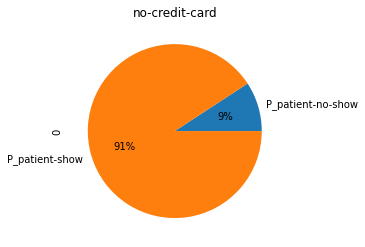

In [26]:
appoint_prob_.iloc[0,1:].plot(kind="pie", autopct='%1.0f%%', title='no-credit-card')  #plotting only index 0 (no-credit-card)

<AxesSubplot:title={'center':'with-credit-card'}, ylabel='1'>

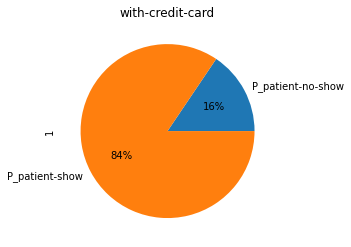

In [27]:
appoint_prob_.iloc[1,1:].plot(kind="pie", autopct='%1.0f%%', title='with-credit-card') #plotting only index 1 (with-credit-card)

# Marginal and conditional probabilities for conversion

Below I will attempt to compute the best estimate of marginal and conditional probabilities for conversion. It is important to note that it is not possible to compute the real probability, but it is possible to compute an estimation of that.

a. What is the probability of an individual converting regardless of the page they receive? $P(conversion)$

In [28]:
n_users = df.shape[0]
total_conversions = (df.loc[df.converted == 1].converted.count())

# Prob of conversion regardless of the page
Pconv = total_conversions / n_users
Pconv

0.049586776859504134

b. Given that an individual was in the `no-credit-card` group, what is the probability they converted? $P(conversion | no-credit-card)$

In [29]:
# Prob of conversion in no-credit-card group
no_card_df = df.loc[df.experiment_group == "no-credit-card"]
n_no_card = no_card_df.shape[0]
n_conv_no_card = no_card_df['converted'].sum()

P_conv_no_card = n_conv_no_card / n_no_card
P_conv_no_card

0.0425531914893617

c. Given that an individual was in the `with-credit-card` group, what is the probability they converted? $P(conversion | with-credit-card)$

In [30]:
# Prob of conversion in with-credit-card group
with_card_df = df.loc[df.experiment_group == "with-credit-card"]
n_with_card = with_card_df.shape[0]
n_conv_with_card = with_card_df['converted'].sum()

P_conv_with_card = n_conv_with_card / n_with_card
P_conv_with_card

0.0594059405940594

d. What is the probability that an individual received the `with-credit-card page`? $P(with-credit-card)$

In [31]:
# Prob of receiving with-credit-card page
P_with_card = n_with_card /n_users
P_with_card

0.41735537190082644

In [32]:
print("Summary of dataset")
print("  Total samples of")
print("\t- the data set: " + str(n_users))
print("\t-   with-credit-card size: " + str(n_with_card))
print("\t-   no-card-card size: " + str(n_no_card))
print("\t- conversion: " + str(total_conversions))
print("\t-   conversion in no_card set: " + str(n_conv_no_card))
print("\t-   conversion in with_card set: " + str(n_conv_with_card))
print("  Probabilities \n  Our best estimations of these probabilities, are the following proportions:")
print("\t- of conversion regardles of group: " + str(round(Pconv*100,2)) + "%")
print("\t- of conversion in no-credit-card group: " + str(round(P_conv_no_card*100,2)) + "%")
print("\t- of conversion in with-credit-card group: " + str(round(P_conv_with_card*100,2)) + "%")
print("\t- of receiving with-credit-card page: " + str(round(P_with_card*100,2)) + "%")

Summary of dataset
  Total samples of
	- the data set: 242
	-   with-credit-card size: 101
	-   no-card-card size: 141
	- conversion: 12
	-   conversion in no_card set: 6
	-   conversion in with_card set: 6
  Probabilities 
  Our best estimations of these probabilities, are the following proportions:
	- of conversion regardles of group: 4.96%
	- of conversion in no-credit-card group: 4.26%
	- of conversion in with-credit-card group: 5.94%
	- of receiving with-credit-card page: 41.74%


**Conclusions:** Using the web page which askes for credit card details during signup results in higher probability of conversion (5.94%) compared with using the page which does not (4.26%). However, the probability of patient receiving the with-credit-card page was just over 40%. It is not possible to conclude with the dataset provided whether patients had indeed lesser chance of receinging the with-credit-card page or whether this version prevented some patients from signing up resulting with those with more serious intentions of receiving the procedure to go ahead. It would be advisable to compare this data with the overall trafic on each version of the page or perhaps to repeat the experiment and compare results.

# Hypotesis Test

In [33]:
print("\tProbability of conversion when using with-credit-card page: " + str(round(P_conv_with_card,4)))
print("\tProbability of conversion when using no-credit-card page: " + str(round(P_conv_no_card,4)))
print("\n\tDifference between the two probabilities: " + str(round((P_conv_with_card-P_conv_no_card),4)))

	Probability of conversion when using with-credit-card page: 0.0594
	Probability of conversion when using no-credit-card page: 0.0426

	Difference between the two probabilities: 0.0169


Let's do a hypohesis test to clearly detect if the difference is statistically significant.

Does this difference justify to assume that with-credit-card page resulted in better conversion than no-credit-card one? In other words, with a 5% of significance, can we keep assuming that this is true?

---
**Define the null and alternative hypothesis**

$H_0$: P(conversion of with-credit-card) - P(conversion of no-credit-card) > 0

$H_A$: P(conversion of with-credit-card) - P(conversion of no-credit-card) <= 0

For this, let's use `stats.proportions_ztest` to compute your test statistic and p-value.

In [34]:
import statsmodels.api as sm

z_score, p_value = sm.stats.proportions_ztest([n_conv_with_card, n_conv_no_card], [n_with_card, n_no_card], alternative='larger')
z_score, p_value

(0.5955169682054368, 0.27574898013008986)

In [35]:
if p_value < 0.05 :
    print(f'Since the p-value is much less than significance level the difference is significant')
    print()
    print('\n We reject the null hypothesis')
    
else:
    print(f'With a p-value of {round(p_value,4)} the difference is NOT significant')
    print()
    print('\nWe fail to reject the null hypothesis')

With a p-value of 0.2757 the difference is NOT significant


We fail to reject the null hypothesis


Conclusions: The hypothesis test failed to reject the null hypothesis which means that the with-credit-card page resulted in better conversion rate than no-credit-card one.

# Creating a dataframe with all probabilities for visualisation

In [36]:
prob=({'Event':['Booking','Cancellation','Consultation','Surgery'],
      'Both groups':[Pbooking,Pcancellation,Pappoint,Pconv],
      'no_credit_card':[P_booking_no_card,P_cancellation_no_card,P_appoint_no_card,P_conv_no_card],
      'with_credit_card':[P_booking_with_card,P_cancellation_with_card,P_appoint_with_card,P_conv_with_card]})

df_p=pd.DataFrame(prob)
df_p

,Event,Both groups,no_credit_card,with_credit_card
0,Booking,0.553719,0.595745,0.495050
1,Cancellation,0.066116,0.070922,0.059406
2,Consultation,0.500000,0.539007,0.445545
3,Surgery,0.049587,0.042553,0.059406


In [37]:
df_p['Difference'] = (df_p['no_credit_card'] - df_p['with_credit_card'])
df_p

,Event,Both groups,no_credit_card,with_credit_card,Difference
0,Booking,0.553719,0.595745,0.495050,0.100695
1,Cancellation,0.066116,0.070922,0.059406,0.011516
2,Consultation,0.500000,0.539007,0.445545,0.093463
3,Surgery,0.049587,0.042553,0.059406,-0.016853


In [38]:
df_p['Both groups'] = round(df_p['Both groups']*100,2)
df_p['no_credit_card'] = round(df_p['no_credit_card']*100,2)
df_p['with_credit_card'] = round(df_p['with_credit_card']*100,2)
df_p['Difference'] = round(df_p['Difference']*100,2)

In [39]:
df_p

,Event,Both groups,no_credit_card,with_credit_card,Difference
0,Booking,55.37,59.57,49.50,10.07
1,Cancellation,6.61,7.09,5.94,1.15
2,Consultation,50.00,53.90,44.55,9.35
3,Surgery,4.96,4.26,5.94,-1.69


In [40]:
df_p.to_csv('events_stats.csv')